In [1]:
#loads

library(hsi)
library(raster)
library(usethis)
library(devtools)
library(rgdal)
library(future)
library(furrr)

Loading required package: sp

rgdal: version: 1.5-17, (SVN revision 1070)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.0.4, released 2020/01/28
Path to GDAL shared files: /usr/share/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 6.3.1, February 10th, 2020, [PJ_VERSION: 631]
Path to PROJ shared files: /usr/share/proj
Linking to sp version:1.4-4
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading rgdal.


Attaching package: ‘future’


The following object is masked from ‘package:raster’:

    values




In [2]:
## Localidades en shapefile de la especies con los anios
poncaloc<-rgdal::readOGR("/shared_volume/Ponca_DV_loc/","poncadav2")


OGR data source with driver: ESRI Shapefile 
Source: "/shared_volume/Ponca_DV_loc", layer: "poncadav2"
with 106 features
It has 4 fields
Integer64 fields read as strings:  Year 


In [3]:
#Se reproyectan las localidades
poncaloc<-sp::spTransform(poncaloc,
                          CRSobj = "+proj=lcc +lat_1=17.5 +lat_2=29.5 +lat_0=12 +lon_0=-102 +x_0=2500000 +y_0=0 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0")


In [4]:
colnames(poncaloc@coords)


[1] "coords.x1" "coords.x2"

In [5]:
#Información general de las localidades
print(poncaloc)


class       : SpatialPointsDataFrame 
features    : 106 
extent      : 2182204, 4032337, 456544, 1228518  (xmin, xmax, ymin, ymax)
crs         : +proj=lcc +lat_0=12 +lon_0=-102 +lat_1=17.5 +lat_2=29.5 +x_0=2500000 +y_0=0 +datum=WGS84 +units=m +no_defs 
variables   : 4
names       :       Especie,     Latitud, Longitud, Year 
min values  : Panthera onca,     15.9675, -105.037, 2004 
max values  : Panthera onca, 23.05833056, -87.1511, 2014 


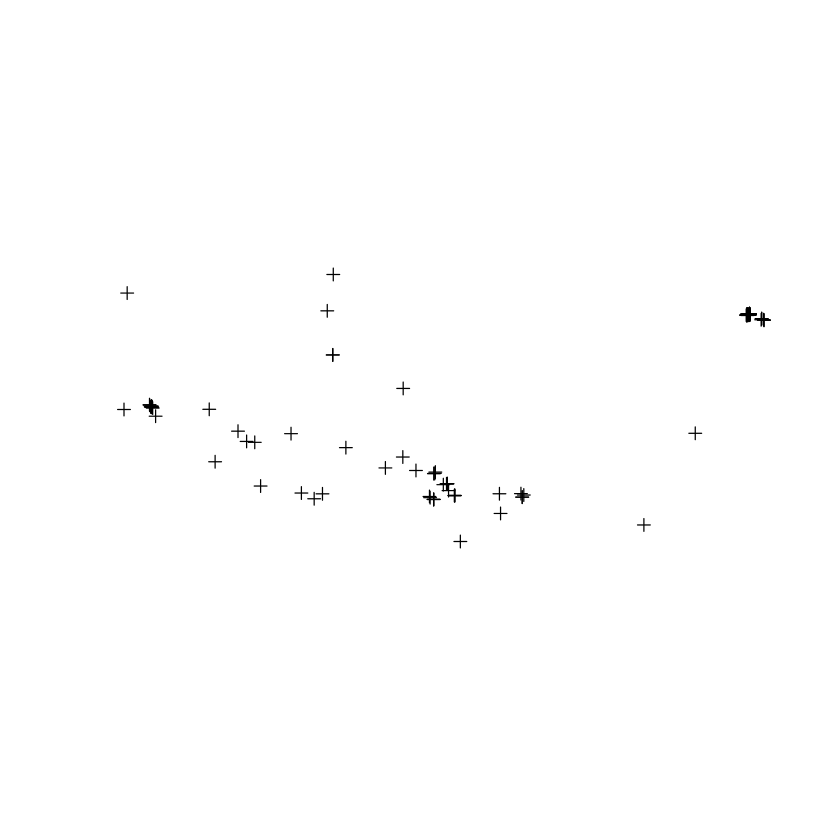

In [6]:
plot(poncaloc)

In [7]:
ponca_mask <- raster::raster("/shared_volume/Ponca_DV/poncamask.tif")

In [8]:
print(ponca_mask)

class      : RasterLayer 
dimensions : 2160, 3300, 7128000  (nrow, ncol, ncell)
resolution : 1000, 1000  (x, y)
extent     : 850000, 4150000, 250000, 2410000  (xmin, xmax, ymin, ymax)
crs        : +proj=lcc +lat_0=12 +lon_0=-102 +lat_1=17.5 +lat_2=29.5 +x_0=2500000 +y_0=0 +datum=WGS84 +units=m +no_defs 
source     : /shared_volume/Ponca_DV/poncamask.tif 
names      : poncamask 
values     : 1, 1  (min, max)



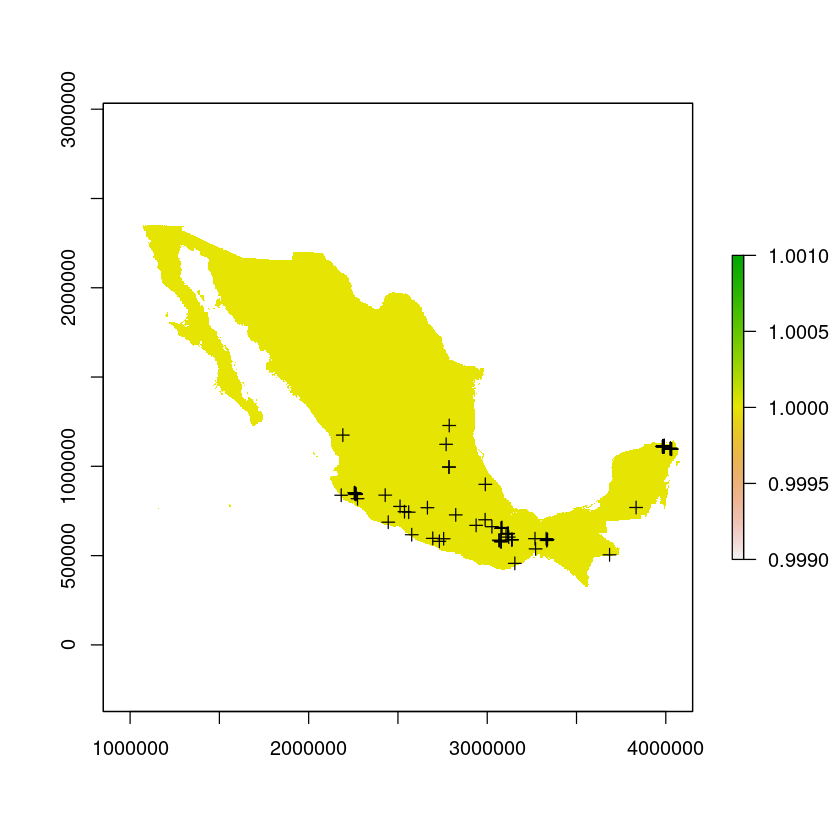

In [9]:
plot(ponca_mask)
plot(poncaloc,add=T)

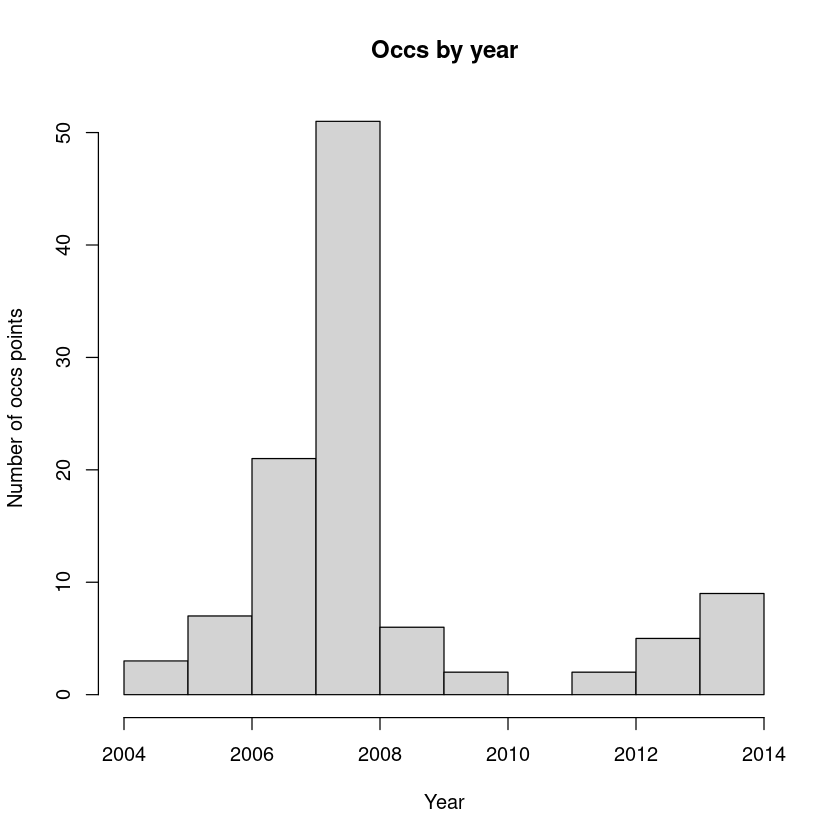

In [10]:
#histograma de frecuencia, reclasificacion de anios al periodo de reproyeccion
test_sp<-sp_temporal_data(occs=poncaloc,longitude = "coords.x1",
                          latitude = "coords.x2",sp_year_var="Year",
                          layers_by_year_dir ="/shared_volume/forest_jEquihua_mar/",
                          layers_ext = "*.tif$",reclass_year_data = T)

In [11]:
#Filtrar las localidades que se usaran mediante la mascara
test_sp_mask <- occs_filter_by_mask(test_sp,ponca_mask)
#Limpia localidades duplicadas por anio
test_sp_clean <- clean_dup_by_year(this_species = test_sp,
                                   threshold = res(ponca_mask)[1])

In [12]:
#save(test_sp_clean,file = "/Users/Mariana/Google Drive/andonue/Ponca_DV/new_model/test_ponca_clean.RData")
#Obtiene los valores ambientales mediante un extract de los puntos ocn las variables ambientales por año

Create dir 

```
/shared_volume/puma/

```

In [13]:
e_test<-extract_by_year(this_species=test_sp_clean,layers_pattern="_mar")

In [14]:
e_test

coords.x1,coords.x2
<dbl>,<dbl>
2182204,838174.6
2731964,580199.0
2989276,899100.0
2695030,596691.5
3329681,594993.1
3337959,590978.3
3270762,537666.1
3333355,584871.8
3267508,594632.6


In [15]:
save(e_test,file="/shared_volume/puma/e_puma_test.RData")

In [16]:
#find_best_model

In [17]:
#if nbook returns any error we can load test e_puma_test.RData:
#load(file ="/shared_volume/puma/e_puma_test.RData" )
#library(hsi)
#library(magrittr)
#library(raster)
#library(usethis)
#library(devtools)
#library(rgdal)
#library(future)
#library(furrr)

In [18]:
#load(file ="/shared_volume/puma/e_puma_test.RData" )
#library(hsi)
#library(magrittr)

**Sequential**

In [ ]:
system.time({best_model_2004<-find_best_model(this_species =e_test,
                                              cor_threshold = 0.8,
                                              ellipsoid_level = 0.975,
                                              nvars_to_fit = 3,E = 0.05,
                                              RandomPercent = 70,
                                              NoOfIteration = 1000,
                                              parallel = FALSE,
                                              n_cores = 1,
                                              plot3d = FALSE)})

In [5]:
#best_model_2004

Create dir: 

```bash

/shared_volume/new_model/04_05_2021/

```

In [7]:
ponca_mask <- raster::raster("/shared_volume/Ponca_DV/poncamask.tif")

In [8]:
system.time({
  temporal_projection(this_species = best_model_2004,
                      save_dir = "/shared_volume/new_model/04_05_2021/",
                      sp_mask = ponca_mask,
                      crs_model = NULL,
                      sp_name ="pan_onca",
                      plot3d = FALSE)
  })

[1] "/shared_volume/new_model/04_05_2021//temporal_modeling_pan_onca/2004"
[1] "/shared_volume/new_model/04_05_2021//temporal_modeling_pan_onca/2005"
[1] "/shared_volume/new_model/04_05_2021//temporal_modeling_pan_onca/2006"
[1] "/shared_volume/new_model/04_05_2021//temporal_modeling_pan_onca/2007"
[1] "/shared_volume/new_model/04_05_2021//temporal_modeling_pan_onca/2008"
[1] "/shared_volume/new_model/04_05_2021//temporal_modeling_pan_onca/2009"
[1] "/shared_volume/new_model/04_05_2021//temporal_modeling_pan_onca/2010"
[1] "/shared_volume/new_model/04_05_2021//temporal_modeling_pan_onca/2011"
[1] "/shared_volume/new_model/04_05_2021//temporal_modeling_pan_onca/2012"
[1] "/shared_volume/new_model/04_05_2021//temporal_modeling_pan_onca/2013"
[1] "/shared_volume/new_model/04_05_2021//temporal_modeling_pan_onca/2014"
[1] "/shared_volume/new_model/04_05_2021//temporal_modeling_pan_onca/niche_comparations_results/final_results_pan_onca"


   user  system elapsed 
561.999  47.915 606.634 

**Parallel**

In [ ]:
system.time({best_model_2004<-find_best_model(this_species =e_test,
                                              cor_threshold = 0.8,
                                              ellipsoid_level = 0.975,
                                              nvars_to_fit = 3,E = 0.05,
                                              RandomPercent = 70,
                                              NoOfIteration = 1000,
                                              parallel = TRUE, #Run process in parallel
                                              n_cores = 6,
                                              plot3d = FALSE)})

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The total number of occurrence records that will be used for model validation is: 26 
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

The total number of models to be tested are:  364 ...



Create dir: 

```bash

/shared_volume/new_model_parallel/04_05_2021/

```

In [4]:
ponca_mask <- raster::raster("/shared_volume/Ponca_DV/poncamask.tif")

In [5]:
system.time({
  temporal_projection(this_species = best_model_2004,
                      save_dir = "/shared_volume/new_model_parallel/04_05_2021/",
                      sp_mask = ponca_mask,
                      crs_model = NULL,
                      sp_name ="pan_onca",
                      plot3d = FALSE)
  })

[1] "/shared_volume/new_model_parallel/04_05_2021//temporal_modeling_pan_onca/2004"
[1] "/shared_volume/new_model_parallel/04_05_2021//temporal_modeling_pan_onca/2005"
[1] "/shared_volume/new_model_parallel/04_05_2021//temporal_modeling_pan_onca/2006"
[1] "/shared_volume/new_model_parallel/04_05_2021//temporal_modeling_pan_onca/2007"
[1] "/shared_volume/new_model_parallel/04_05_2021//temporal_modeling_pan_onca/2008"
[1] "/shared_volume/new_model_parallel/04_05_2021//temporal_modeling_pan_onca/2009"
[1] "/shared_volume/new_model_parallel/04_05_2021//temporal_modeling_pan_onca/2010"
[1] "/shared_volume/new_model_parallel/04_05_2021//temporal_modeling_pan_onca/2011"
[1] "/shared_volume/new_model_parallel/04_05_2021//temporal_modeling_pan_onca/2012"
[1] "/shared_volume/new_model_parallel/04_05_2021//temporal_modeling_pan_onca/2013"
[1] "/shared_volume/new_model_parallel/04_05_2021//temporal_modeling_pan_onca/2014"
[1] "/shared_volume/new_model_parallel/04_05_2021//temporal_modeling_pan_onc

   user  system elapsed 
547.807  58.755 601.794 

**Debugging**

In [2]:
stopifnot(inherits(e_test, "sp.temporal.env"))

n_nas <- floor(dim(e_test$env_data_train)[1]*0.1)

env_train <- e_test$env_data_train

rm_layers <- unlist(sapply( 1:dim(env_train)[2], function(x){
  if(length(which(is.na(env_train[,x]))) > n_nas) return(x)
} ))

if(!is.null(rm_layers)){
     env_train <- stats::na.omit(env_train[,-rm_layers])
  }

numericIDs <- which(sapply(env_train, is.numeric))

cor_matrix <- stats::cor(env_train[,numericIDs])

cor_threshold=0.9
ellipsoid_level=0.975
nvars_to_fit=3
plot3d=FALSE
E = 0.05
RandomPercent = 50
NoOfIteration=1000
parallel=FALSE
n_cores=4

ERROR: Error in inherits(e_test, "sp.temporal.env"): object 'e_test' not found


In [4]:

find_cor   <- correlation_finder(cor_mat = cor_matrix,
                                 threshold = cor_threshold,
                                 verbose = F)

cor_filter <- find_cor$descriptors


combinatoria_vars <- combn(length(cor_filter),nvars_to_fit)


year_to_search <- min(as.numeric(names(e_test$layers_path_by_year)))


cat("The total number of models to be tested are: ", dim(combinatoria_vars)[2],"...\n\n")

env_layers <- raster::stack(e_test$layers_path_by_year[[paste0(year_to_search)]])

this_species <- e_test

The total number of models to be tested are:  969 ...



In [3]:
plan(tweak("multiprocess", workers = n_cores))

In [ ]:
modelos <- 1:dim(combinatoria_vars)[2] %>%
  furrr::future_map(function(x){
    #cat("Doing model: ", x," of ", dim(combinatoria_vars)[2],"\n")
    cat(sprintf("Doing model: %d of %d \n", x , dim(combinatoria_vars)[2]))

    # Varaibles filtadas por combinatiria de las mas representativas
    vars_model <- cor_filter[combinatoria_vars[,x]]
    ellip <- try(cov_center(env_train[,vars_model],
                            level = ellipsoid_level ,vars = vars_model),silent = T)
    if(class(ellip)=="try-error") return()

    # Datos de presencia de la sp en el ambiente
    occs_env <- this_species$env_data_train[,vars_model]

    # Ajuste del modelo de elipsoide

    sp_model <- ellipsoidfit(data = env_layers[[vars_model]],
                             centroid =ellip$centroid,
                             covar =  ellip$covariance,
                             level = ellipsoid_level,
                             size = 3,
                             plot = plot3d)

    if(length(ellip$centroid)==3 && plot3d){
      # Presencias de la sp en el ambiente
      rgl::points3d(occs_env,size=10)

      # Ejes del elipsoide

      rgl::segments3d(x = ellip$axis_coordinates[[1]][,1],
                      y = ellip$axis_coordinates[[1]][,2],
                      z = ellip$axis_coordinates[[1]][,3],
                      lwd=3)


      rgl::segments3d(x = ellip$axis_coordinates[[2]][,1],
                      y = ellip$axis_coordinates[[2]][,2],
                      z = ellip$axis_coordinates[[2]][,3],
                      lwd=3)

      rgl::segments3d(x = ellip$axis_coordinates[[3]][,1],
                      y = ellip$axis_coordinates[[3]][,2],
                      z = ellip$axis_coordinates[[3]][,3],
                      lwd=3)

    }

    valData <- this_species$test_data[,c(1,2)]
    valData$sp_name <- "sp"
    valData <- valData[,c(3,1,2)]
    p_roc<- PartialROC(valData = valData,
                       PredictionFile = sp_model$suitRaster,
                       E = E,
                       RandomPercent = RandomPercent,
                       NoOfIteration = NoOfIteration)
    p_roc$auc_pmodel <- paste0(x)

    return(list(model = sp_model$suitRaster,
                pRoc=p_roc[,c("auc_ratio","auc_pmodel")],
                metadata=ellip))
  })


In [ ]:
system.time({best_model_2004<-find_best_model(this_species =e_test,
                                              cor_threshold = 0.8,
                                              ellipsoid_level = 0.975,
                                              nvars_to_fit = 3,E = 0.05,
                                              RandomPercent = 70,
                                              NoOfIteration = 1000,
                                              parallel = TRUE, #Run process in parallel
                                              n_cores = 6,
                                              plot3d = FALSE)})